# Bibliotecas Usadas

In [164]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress, t, ttest_ind, norm

# Funções auxiliares e úteis

In [22]:
def padrao_grafico():
    plt.xlim(-1, 9)
    plt.ylim(-1, 9)
    plt.plot([-1, 9], [0, 0], color="black")
    plt.plot([0, 0], [-1, 9], color="black")
    plt.xlabel("Gene X")
    plt.ylabel("Gene Y")

# A)

Os dados da primeira figura, serão dados crescentes no intervalo de 0 a 9

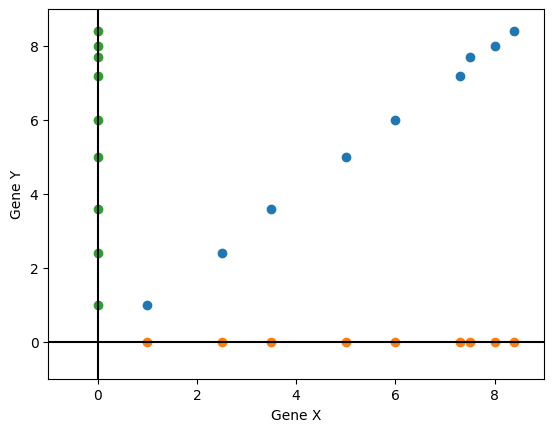

In [23]:
gen_x_figura1 = np.array([1, 2.5, 3.5, 5, 6, 7.3, 7.5, 8, 8.4])
gen_y_figura1 = np.array([1, 2.4, 3.6, 5, 6, 7.2, 7.7, 8, 8.4])
n = 9

padrao_grafico()
plt.scatter(gen_x_figura1, gen_y_figura1)
plt.scatter(gen_x_figura1, [0]*n)
plt.scatter([0]*n, gen_y_figura1)
plt.show()

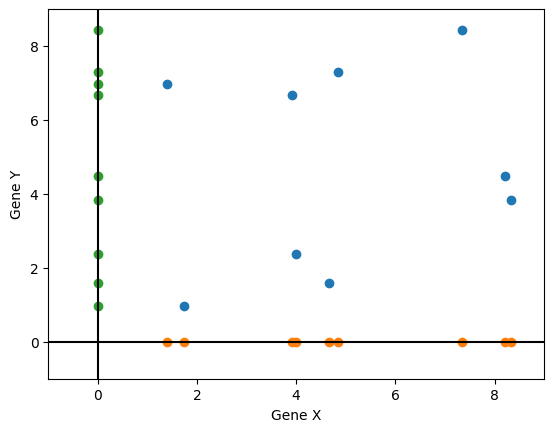

In [24]:
gen_x_figura2 = np.random.uniform(0, 9, 9)
gen_y_figura2 = np.random.uniform(0, 9, 9)
n = 9

padrao_grafico()
plt.scatter(gen_x_figura2, gen_y_figura2)
plt.scatter(gen_x_figura2, [0]*n)
plt.scatter([0]*n, gen_y_figura2)
plt.show()

Com os meus dados em mãos, iremos aplicar a função linregress e recuperaremos o gráfico e o pvalue

## Gráfico 01

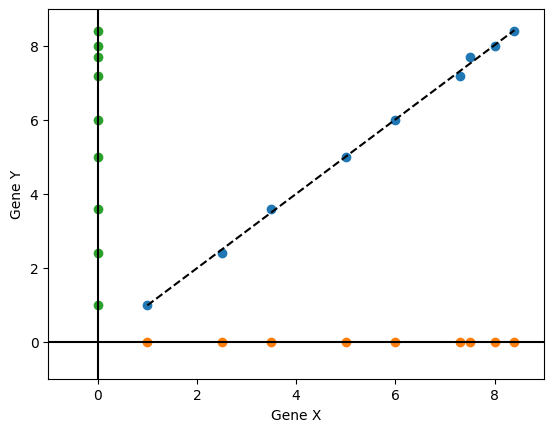

p-value: 1.6878809921670774e-11


In [25]:
slope, intercept, _, p_value, _ = linregress(gen_x_figura1, gen_y_figura1)
regressao_linear_figura1 = (slope * gen_x_figura1) + intercept

padrao_grafico()
plt.scatter(gen_x_figura1, gen_y_figura1)
plt.scatter(gen_x_figura1, [0]*n)
plt.scatter([0]*n, gen_y_figura1)
plt.plot(gen_x_figura1, regressao_linear_figura1, linestyle="--", color="black")
plt.show()
print(f"p-value: {p_value}")

>Observa-se que a reta ajustada acompanha de perto os pontos experimentais, e essa disposição aproximadamente linear dos dados indica a presença de correlação linear entre as variáveis analisadas.
>
>O valor do *p-value* obtido é menor que 0.05, o que fornece forte evidência contra a hipótese nula $H_0$, a qual assume que não há relação linear entre as variáveis, ou seja, que a inclinação da reta é nula $(\text{slope} = 0)$. Dessa forma, pode-se afirmar que a correlação linear observada é estatisticamente significativa.
>
>Como a reta apresenta inclinação positiva, conclui-se que existe uma correlação linear positiva, isto é, as variáveis estão diretamente relacionadas.
>
>Ressalta-se, contudo, que o *p-value* não mede a intensidade da relação entre as variáveis, mas apenas indica se a relação observada pode ser atribuída ao acaso.

## Gráfico 02

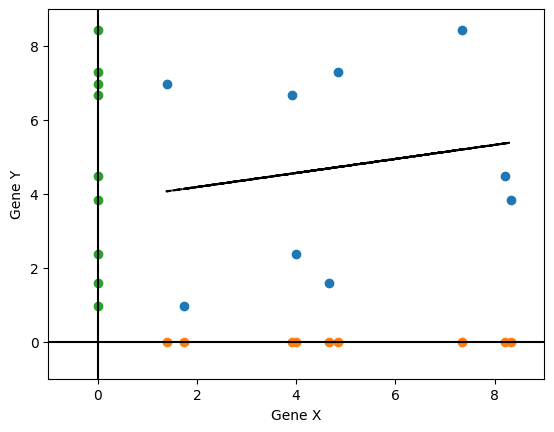

p-value: 0.64491541112672


In [26]:
slope, intercept, _, p_value, _ = linregress(gen_x_figura2, gen_y_figura2)
regressao_linear_figura2 = (slope * gen_x_figura2) + intercept
n = 9

padrao_grafico()
plt.scatter(gen_x_figura2, gen_y_figura2)
plt.scatter(gen_x_figura2, [0]*n)
plt.scatter([0]*n, gen_y_figura2)
plt.plot(gen_x_figura2, regressao_linear_figura2, linestyle="--", color="black")
plt.show()
print(f"p-value: {p_value}")

>Ainda que a reta ajustada não acompanhe a maioria dos pontos, não é possível concluir a existência de uma relação linear significativa entre as características analisadas apenas pela inspeção visual.
>
>Ao analisar o valor do *p-value*, observa-se que este é superior a 0.05, o que indica ausência de evidência estatística para rejeitar a hipótese nula $H_0$, a qual assume que não há relação linear entre as variáveis, isto é, que a inclinação da reta é nula ($\text{slope} = 0$). Dessa forma, conclui-se que a correlação linear observada não é estatisticamente significativa.

# B)

Considere uma amostra da altura de 20 pessoas da cidade de Belém

In [27]:
print(*[round(x*100)/100 for x in np.random.normal(171, 7, 50)], sep=", ")

159.47, 183.62, 175.38, 175.93, 171.43, 168.71, 169.06, 174.79, 170.47, 165.03, 164.5, 175.24, 166.59, 170.18, 178.07, 173.36, 176.51, 185.16, 178.19, 192.57, 171.56, 158.65, 167.06, 181.16, 178.05, 172.34, 178.14, 162.5, 175.99, 169.1, 183.98, 165.7, 175.45, 172.21, 163.24, 168.67, 169.63, 182.17, 170.85, 166.19, 165.29, 168.77, 174.86, 179.52, 173.78, 161.62, 167.44, 176.9, 173.82, 173.19


In [28]:
altura_alunos = np.array([182.2, 170.3, 165.32, 190.55, 184.3, 166.12, 166.39, 177.43, 170.39, 165.45, 172.79, 164.89, 168.73, 163.92, 
                          178.56, 162.19, 169.96, 167.9, 175.03, 167.85, 165.75, 182.59, 168.25, 156.4, 175.14, 171.06, 186.89, 169.62, 
                          161.89, 164.87, 177.8, 160.64, 176.65, 186.47, 168.73, 167.26, 163.41, 170.99, 158.21, 184.07, 176.54, 170.82, 
                          167.76, 161.56, 169.39, 167.69, 171.35, 163.0, 152.92, 174.39])

Para se calcular o intervalo de confiança, utiliza-se a seguinte formula:

$$\text{intervalo de confiança} = \overline x ± t_{\alpha/2, n -1} \cdot \frac{s}{\sqrt n}$$
Onde:

$ \overline x = \text{media amostral} \\
s = \text{desvio padrão amostral} \\
n = \text{tamanho da amostra} \\
\alpha = 1 - \text{nível de confiança} \\
t_{\alpha/2, n - 1} = \text{valor crítico de t para n - 1 graus de liberdade e para um } \alpha$

In [29]:
# DADOS INICIAS
nivel_confianca = 0.95
n = altura_alunos.size
graus_liberdade = n - 1

# MEDIA AMOSTRAL E DESVIO PADRÃO AMOSTRAL
media = np.mean(altura_alunos)
dp = np.std(altura_alunos, ddof= 1)

O valor de $t_{\alpha/2, n - 1}$ pode ser encontrado pela função t.ppf da biblioteca scipy.stats

In [30]:
t_critico = t.ppf(nivel_confianca, graus_liberdade)
t_critico

np.float64(1.6765508926168535)

Calculando o intervalo de confiança

In [31]:
def intervalo_confiança(
        media_amostral : float, 
        desvio_padrao_amostral : float, 
        nivel_confianca: float, 
        graus_liberdade : float, 
        tamanho_amostral : float) -> tuple[float, float]:
       
    alpha = 1 - nivel_confianca
    erro_padrao = (desvio_padrao_amostral / np.sqrt(tamanho_amostral))

    t_critico = t.ppf((1 - alpha / 2), graus_liberdade)
    limite_inferior = media_amostral - t_critico * erro_padrao
    limite_superior = media_amostral + t_critico * erro_padrao
    return limite_inferior, limite_superior

In [32]:
intervalo_confiança(media, dp, nivel_confianca, graus_liberdade, n)

(np.float64(168.13516038622288), np.float64(172.7600396137771))

Colocando isso em um gráfico

In [33]:
def grafico_distribuicao(dados, media, ic_inf, ic_sup, confianca, title : int, t_distri : bool = False):
    plt.hist(dados, bins=15, density=True, alpha=0.5)

    if t_distri:
        x_t = np.linspace(media - 2*dp, media + 2*dp, 400)
        y_t = t.pdf((x_t - media) / (dp / np.sqrt(n)), df= dados.size - 1) / (dp / np.sqrt(n))
        plt.plot(x_t, y_t, linestyle='--', label="Distribuição t")

    plt.axvspan(ic_inf, ic_sup, alpha=0.3, label=f'IC {confianca}%', color="orange")
    plt.axvline(media, label='Média', color="black")
    plt.title(title)
    plt.legend()
    plt.show()


168.13516038622288 172.7600396137771


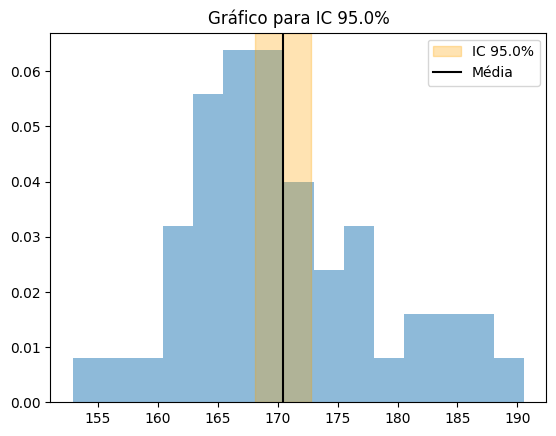

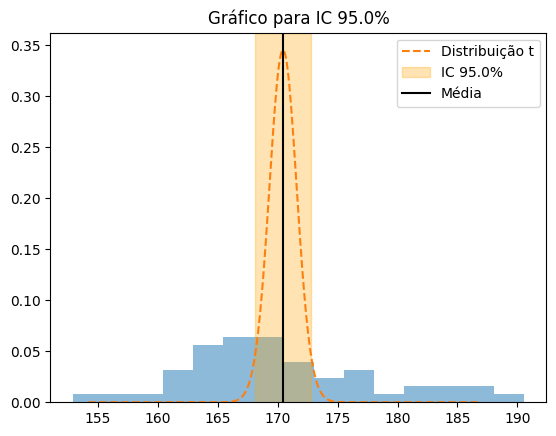

In [34]:
nivel_confianca = 0.95
ic = intervalo_confiança(media, dp, nivel_confianca, graus_liberdade, n)
print(ic[0], ic[1])
grafico_distribuicao(altura_alunos, media, ic[0], ic[1], nivel_confianca*100, f"Gráfico para IC {nivel_confianca*100}%")
grafico_distribuicao(altura_alunos, media, ic[0], ic[1], nivel_confianca*100, f"Gráfico para IC {nivel_confianca*100}%", True)

In [35]:
def mudar_confianca(nivel_confianca):
    ic = intervalo_confiança(media, dp, nivel_confianca, graus_liberdade, n)
    print(ic[0], ic[1])
    grafico_distribuicao(altura_alunos, media, ic[0], ic[1], nivel_confianca*100, f"Gráfico para IC {nivel_confianca*100}%")
    grafico_distribuicao(altura_alunos, media, ic[0], ic[1], nivel_confianca*100, f"Gráfico para IC {nivel_confianca*100}%", True)

169.66565800479208 171.2295419952079


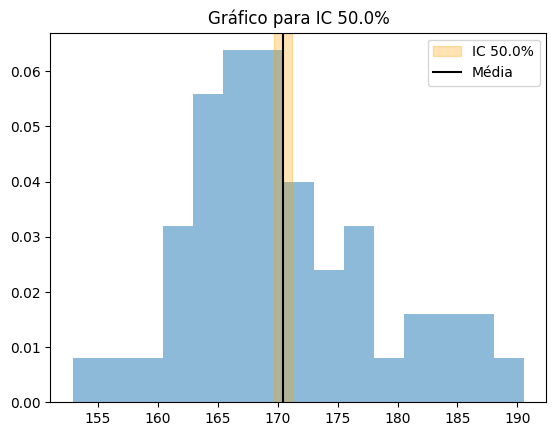

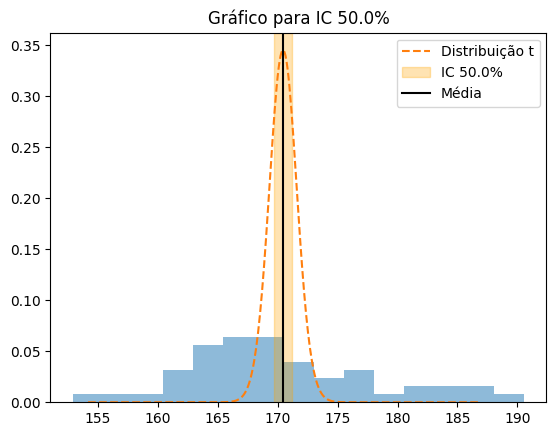

In [36]:
mudar_confianca(0.50)

168.5183750439148 172.3768249560852


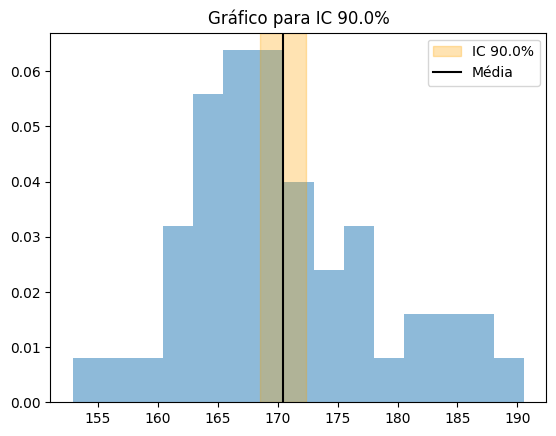

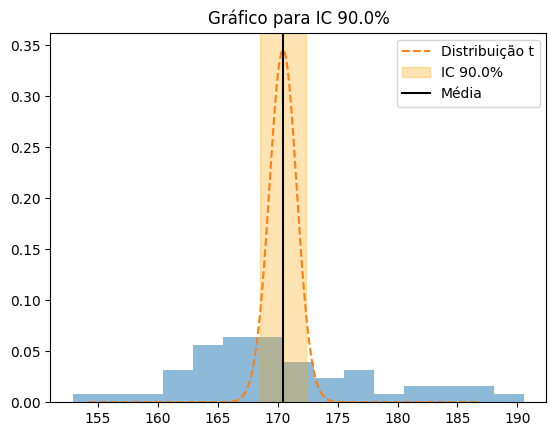

In [37]:
mudar_confianca(0.90)

165.57350508241524 175.32169491758475


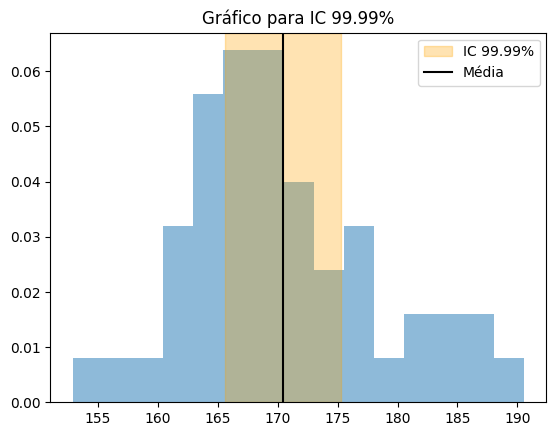

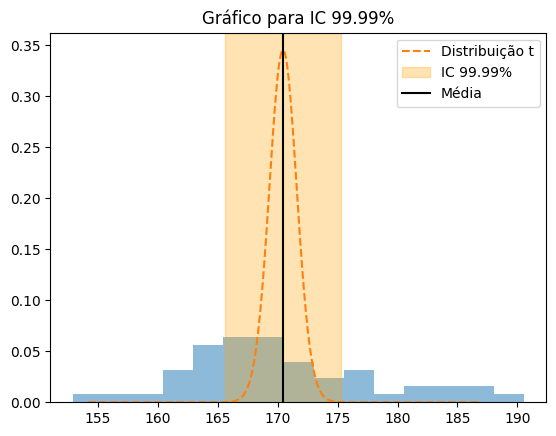

In [38]:
mudar_confianca(0.9999)

O aumento do nível de confiança implica um intervalo mais amplo, refletindo maior segurança estatística à custa de menor precisão na estimativa da média. O inverso também é aplicado, a diminuição do nível de confiança implica um intervalo estrito, menor segurança estatística à custa de maior precisão. 

# C)

Suponha duas moedas, uma justa e outra que não sabemos se é justa ou não, abaixo está uma lista com o número de cara de cada moeda para cada 100 jogadas. Considere os dados de controle, os dados da moeda justa e os dados teste como os dados da moedas que queremos testar.

In [39]:
dados_controle= np.array([47, 56, 48, 48, 52, 50, 50, 51, 49, 47, 53, 46, 51, 48, 49, 53, 49,
                            62, 56, 51, 51, 53, 47, 54, 47, 52, 51, 40, 50, 45, 46, 53, 54, 51,
                            41, 51, 55, 48, 48, 45, 45, 48, 49, 43, 43, 48, 54, 48, 56, 51, 50])

dados_teste = np.array([52, 45, 42, 47, 55, 44, 52, 62, 44, 47, 42, 47, 52, 50, 47, 48, 44,
                        54, 48, 51, 48, 44, 36, 53, 44, 45, 48, 39, 37, 46, 53, 53, 46, 48,
                        51, 44, 53, 50, 52, 46, 48, 45, 50, 49, 53, 41, 44, 50, 50, 42, 53])


Considerando como hipotese nula $H_0$ que ambas as moedas são justas, portanto, possuem a mesma média, temos:

$\text{hipótese nula }(H_0)$:
$$\mu_{1} = \mu_{2} $$

$\text{hipótese alternativa }(H_1)$
$$\mu_{1} \ne \mu_{2} $$
$\mu_{1} = \text{média dos dados de controle}\\
\mu_{2} = \text{média dos dados de teste}$

Agora, realizaremos um teste com as duas amostras para confirmar a hipótese nula

In [40]:
_, p_value = ttest_ind(dados_controle, dados_teste)
print(f"p-value: {p_value:.6f}")

nivel_significancia = 0.05
if p_value < nivel_significancia:
    print("Rejeita a hipótese nula. As médias das diferem")
else:
    print("Falha em rejeitar a hipótese nula.")

p-value: 0.031423
Rejeita a hipótese nula. As médias das diferem


Como visto, o p_value é menor que 0.05, assim a hipótese nula que as médias são iguais foi rejeitada, portanto é possível dizer que a moeda de teste não é justa

# D)

## Análise do código

In [41]:
num_simulations = 10000
sample_size = 30
true_mean = 50
true_std = 10
significance_level = 0.05 #Usar valores diferentes


significant_results = 0


for _ in range(num_simulations):

    group1 = np.random.normal(true_mean, true_std, sample_size)
    group2 = np.random.normal(true_mean, true_std, sample_size)


    t_stat, p_value = ttest_ind(group1, group2)


    if p_value < significance_level:
        significant_results += 1


proportion_significant = significant_results / num_simulations


print(f"Number of simulations: {num_simulations}")
print(f"Significance level (alpha): {significance_level}")
print(f"Proportion of significant results (Type I error rate): {proportion_significant:.4f}")


Number of simulations: 10000
Significance level (alpha): 0.05
Proportion of significant results (Type I error rate): 0.0506


Esse código testa duas amostras de um mesmo grupo e compara em um t-test, depois verifica se o resultado e significante. Ele repete o processo 10000 vezes e guarda quantos resultados significativos foram encontrados. Por fim, faz a proporção da significância.

In [42]:
# Características da amostra e do experimente

num_simulations = 10000 #Quantas vezes o teste será realizado
sample_size = 30 #Tamanho das amostras
true_mean = 50 #Média verdadeira da população
true_std = 10 #Desvio padrão verdadeiro da população

significance_level = 0.01 #Nível de significancia

In [43]:
# Quantidade de resultados significantes
significant_results = 0

for _ in range(num_simulations):

    # Cria as duas amostras
    group1 = np.random.normal(true_mean, true_std, sample_size)
    group2 = np.random.normal(true_mean, true_std, sample_size)

    # Executa um t-test para os dois grupos
    t_stat, p_value = ttest_ind(group1, group2)

    # Analisa se o resultado é significante
    if p_value < significance_level:
        significant_results += 1

# Calcula a proproção dos resultados significantes pelo número de simulações
proportion_significant = significant_results / num_simulations

## Interpretação

Esse código encontra a proporção de significancia em várias simualações de t-test, ou seja, calcula a porcentagem referente a quantidade de vezes que a hipótese nula foi rejeitada. Porém como ambas as amostras vieram de populações de mesma características, a hipótese nula, que as médias são iguais, é verdadeira, assim essa proporção de significancia representa a taxa de erro do Tipo I, isto é, representa quantos desses resultados geraram um falso positivo.

Note que a proporção de significância tende ao nível de significância, isso ocorre pois o nível de significância representa o risco máximo que você aceita correr de concluir que existe um efeito quando, na verdade, não existe, ou seja, um falso positivo. Logo é natural que a proporção da significância converge para o nível de significância

Se testarmos para outros níveis de significancia, a prorpoção de significancia também mudará

In [44]:
num_simulations = 10000
sample_size = 30
true_mean = 50
true_std = 10
significance_level = 0.001 #Usar valores diferentes


significant_results = 0


for _ in range(num_simulations):

    group1 = np.random.normal(true_mean, true_std, sample_size)
    group2 = np.random.normal(true_mean, true_std, sample_size)


    t_stat, p_value = ttest_ind(group1, group2)


    if p_value < significance_level:
        significant_results += 1


proportion_significant = significant_results / num_simulations


print(f"Number of simulations: {num_simulations}")
print(f"Significance level (alpha): {significance_level}")
print(f"Proportion of significant results (Type I error rate): {proportion_significant:.4f}")


Number of simulations: 10000
Significance level (alpha): 0.001
Proportion of significant results (Type I error rate): 0.0009


[link para os slides no canva](https://www.canva.com/design/DAG_ka07zOw/PJqHsiolYdn5te52qC4vcA/edit)

# D)

Dados nosso banco de dados de mulheres e seus batimentos cardiacos em repouso, pergunta-se Qual a média dos batimentos cardíacos da mulheres e qual a proporção de mulheres que possuem altos batimentos cardíacos.

Para isso usarei um t-test para encontrar uma média aproximada e um z-test para encontrar a proporção de mulhere com batimento acima da média

### t-test

Cria a amostra

In [157]:
media_real = 75
desvio_real = 10

amostra = np.array([int(x) for x in np.random.normal(media_real, desvio_real, 50)])
media_amostral = np.mean(amostra)
desvio_amostral = np.std(amostra, ddof=1)
n = amostra.size
amostra

array([ 75,  85,  68,  79, 101,  68,  73, 101,  93,  70,  72,  56,  69,
        87,  63,  77,  78,  88,  90,  65,  71,  81,  76,  71,  81,  77,
        77,  70,  80,  94,  71,  81,  72,  87,  68,  69,  64,  68,  76,
        80,  78,  83,  61,  63,  54,  61,  80,  72,  77,  83])

Defino o nível de confiança e o grau de liberdade para calcular o t-crítico

In [158]:
nivel_confianca = 0.975
graus_liberdade = 49

t_critico = t.ppf(nivel_confianca, graus_liberdade)
t_critico

np.float64(2.0095752371292392)

Calculo o limite superior e inferior

In [177]:
limite_inferior = media_amostral - t_critico * (desvio_amostral / np.sqrt(n))
limite_superior = media_amostral + t_critico * (desvio_amostral / np.sqrt(n))

print(f"Com 95% de confança, o batimento cardiaco média das mulheres está entre {limite_inferior:.3f} e {limite_superior:.3f} bpm")


Com 95% de confança, o batimento cardiaco média das mulheres está entre 70.864 e 77.576 bpm


Z-test

Considerando um batimento cardíaco alto maior ou igual a 90

In [166]:
media_real = 75
desvio_real = 10

amostra = np.array([int(x) for x in np.random.normal(media_real, desvio_real, 50)])
media_amostral = np.mean(amostra)
desvio_amostral = np.std(amostra, ddof=1)
n = amostra.size
amostra

array([76, 70, 87, 94, 73, 76, 63, 61, 65, 83, 60, 67, 64, 67, 52, 84, 91,
       99, 92, 55, 77, 81, 87, 63, 70, 44, 52, 70, 78, 82, 75, 80, 72, 62,
       73, 76, 72, 78, 82, 73, 64, 86, 91, 73, 78, 66, 92, 72, 77, 86])

In [165]:
nivel_confianca = 0.975

z_critico = norm.ppf(nivel_confianca)
z_critico

np.float64(1.959963984540054)

Calculo da proporção da amostra

In [173]:
p = np.mean(amostra >= 90)
p

np.float64(0.12)

In [178]:
limite_inferior = p - z_critico * (np.sqrt(p * (1 - p) / n))
limite_superior = p + z_critico * (np.sqrt(p * (1 - p) / n))

print(f"Com 95% de confiança, a proproção de mulheres com batimentos cardíacos altos está entre {limite_inferior:.3f} e {limite_superior:.3f}")

Com 95% de confiança, a proproção de mulheres com batimentos cardíacos altos está entre 0.030 e 0.210


# F)